# Big Data Management and Analysis in Physics Research
# Claudio Fadda (813499)

## Esercizio Classificazione

L'Organizzazione mondiale della sanità ha stimato che 12 milioni di decessi si verificano in tutto il mondo, ogni anno a causa di malattie cardiache. La metà dei decessi negli Stati Uniti e in altri paesi sviluppati è dovuta a malattie cardiovascolari. La prognosi precoce delle malattie cardiovascolari può aiutare a prendere decisioni sui cambiamenti dello stile di vita nei pazienti ad alto rischio e, a sua volta, ridurre le complicanze.

In questo esercizio si chiedere di utilizzare i decision tree (e magari i boosted decision trees) per individuare i fattori di rischio / delle malattie cardiache più rilevanti e prevedere il rischio complessivo utilizzando la regressione logistica.

Il dataset con i dati che useremo si trova nel filw `data/framingham.csv`. Il dataset contiene i seguenti dati:

Demografici:
- male: maschio o femmina (nominale)
- age: età del paziente (continua - Sebbene le età registrate siano state troncate a numeri interi, il concetto di età è continuo)

Comportamentali:
- currentSmoker: se il paziente sia o meno un fumatore attuale (nominale)
- cigsPerDay: il numero di sigarette che la persona ha fumato in media in un giorno (può essere considerato continuo in quanto si può avere un numero qualsiasi di sigarette, anche mezza sigaretta)

Storia medica:
- BPMeds: se il paziente assumeva o meno un farmaco per la pressione arteriosa (nominale)
- prevalentStroke: se il paziente ha avuto o meno un ictus (nominale)
- prevalentHyp: se il paziente è iperteso (nominale)
- diabetes: se il paziente ha o meno il diabete (nominale)

Situazione medica attuale:
- totChol: livello di colesterolo totale (continuo)
- sysBP: pressione arteriosa sistolica (continua)
- diaBP: pressione arteriosa diastolica (continua)
- BMI: indice di massa corporea (continuo)
- heartRate: frequenza cardiaca (continua - Nella ricerca medica, variabili come la frequenza cardiaca, sebbene in realtà discrete, sono comunque considerate continue a causa del gran numero di possibili valori)
- glucose: livello di glucosio (continuo)

Variabile che si vuole predire (target desiderato):
- TenYearCHD: Rischio di malattia coronarica nei prossimi 10 anni CHD (binario: '1' significa sì, '0' significa no)

Si richiede di leggere il dataset, fare una parte di statistica descrittiva e quindi di provare a creare un albero decisionale sui dati in esso contenuti per descrivere quali variabili influiscono maggiormente sul consumo alcolico nei ragazzi.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

In [7]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [8]:
framingham = pd.read_csv("AULA1/framingham.csv")
framingham

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## Analisi descrittive

In [9]:
print("Uomini: " + str(framingham.male.sum()))
print("Donne: " + str(framingham.male.count() - framingham.male.sum()))

Uomini: 1819
Donne: 2419


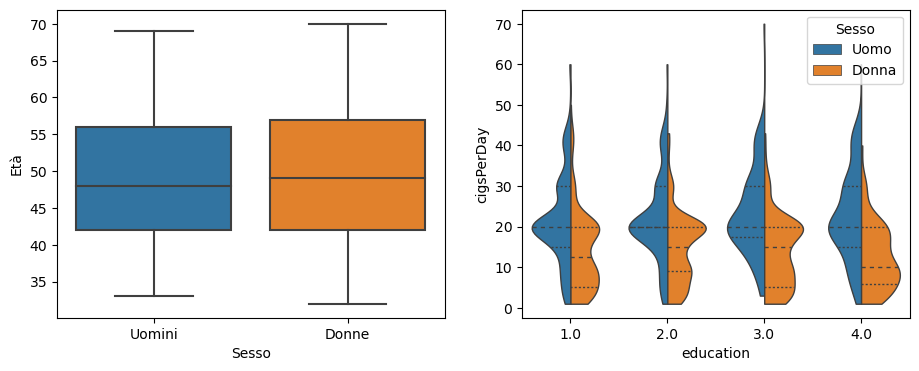

In [10]:
dfMale = framingham[framingham["male"]==1]
dfMale = dfMale.rename(columns={"age":"Uomini"})
dfFemale = framingham[framingham["male"]==0]
dfFemale = dfFemale.rename(columns={"age":"Donne"})
df = pd.concat([dfMale['Uomini'].reset_index(drop=True), dfFemale['Donne'].reset_index(drop=True)], axis=1)

cc = framingham[framingham["cigsPerDay"] >= 1]
cc = cc.rename(columns={"male": "Sesso"})
cc['Sesso'].replace({0:'Donna', 1:'Uomo'}, inplace=True)

plt.subplots(figsize=(11, 4))
plt.subplot(1, 2, 1)

sns.boxplot(x='variable', y='value', data=pd.melt(df)).set(
            xlabel='Sesso', 
            ylabel='Età')

plt.subplot(1, 2, 2)
sns.violinplot(data=cc, x="education", y="cigsPerDay", hue="Sesso", cut = 0, split=True, inner="quart", linewidth=1)

plt.show()

La distribuzione delle età tra uomini e donne è all'incirca uguale, 25° e 75° percentile corrispondono.

I violin plot mostrano il numero di sigarette al giorno consumate da uomini e donne, ripartiti per il loro livello di istruzione:
- negli uomini la mediana coincide in tutti i livelli di istruzione, assestandosi su un valore pari a 20 sigarette al giorno;
- nelle donne la mediana è più bassa, sopratutto nel livello più alto di istruzione; inoltre, le donne tendono a fumare meno sigarette al giorno.

In [6]:
framingham[["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]].describe()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


## Preprocessing
### Valori nulli

<AxesSubplot:>

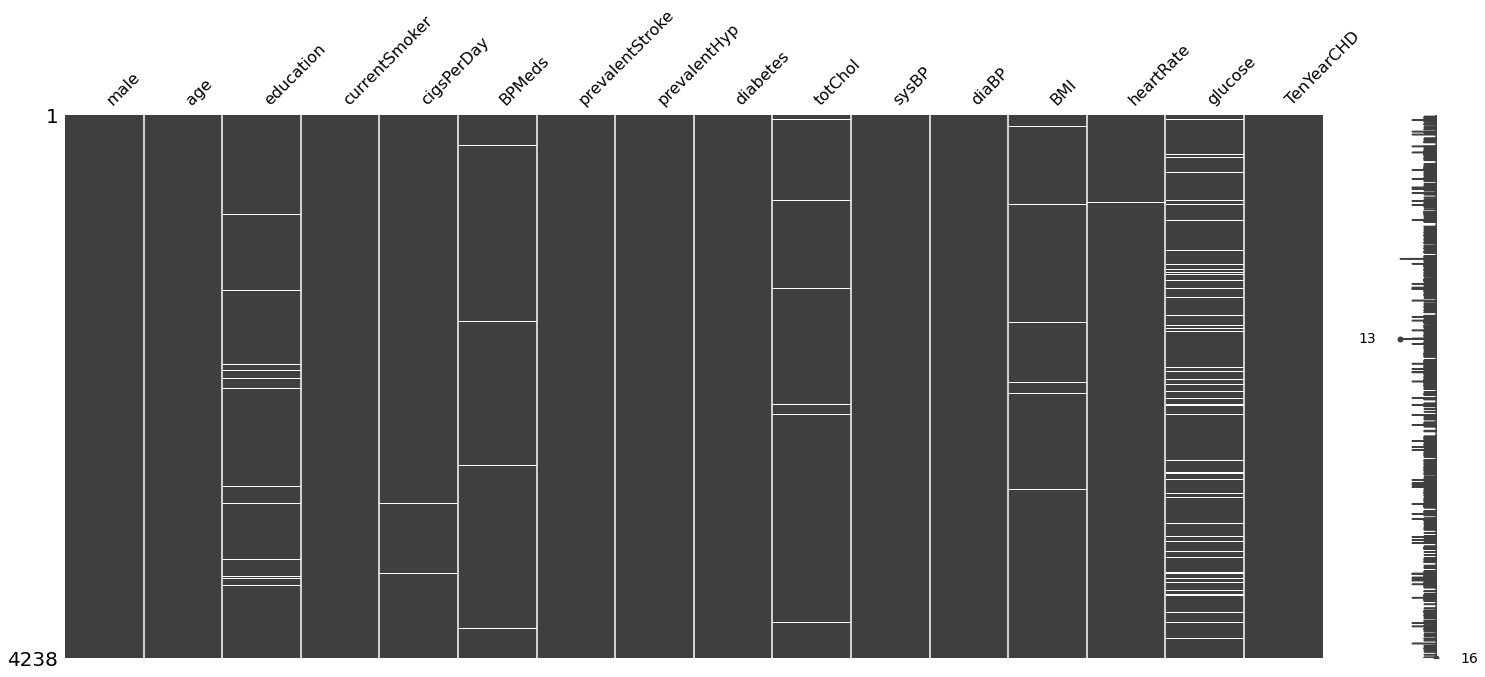

In [7]:
import missingno as msno
msno.matrix(framingham)

In [13]:
framingham.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

La colonna contenente relativa ad "education" e "glucose" sono quelle con il maggior numero di valori mancanti, cerchiamo di rimpiazzarli:
- education: si può usare la tecnica Missing Completely at Random (MCAR), ossia inseriamo una probabilità identica per tutti i livelli di istruzione;
- glucose (e le altre relative colonne): tecnica del  K-Nearest Neighbor (K-NN) e Multiple Imputation by Chained Equation (MICE) e valutarne gli effetti scegliendo la migliore.


MCAR su "education"

In [22]:
df1Framingham = framingham.copy()
df1Framingham[df1Framingham["education"].isnull()]
df1Framingham["education"] = df1Framingham["education"].apply(lambda l: l if not np.isnan(l) else np.random.choice([1, 2, 3, 4], p=[0.25, 0.25, 0.25, 0.25,]))

K-NN e MICE sulle altre colonne

In [23]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df1Framingham_mice = dfFramingham.copy()
df1Framingham_mice.iloc[:,:] = MICE_imputer.fit_transform(df1Framingham_mice)

In [24]:
from fancyimpute import KNN
knn_imputer = KNN()
df1Framingham_knn = dfFramingham.copy()
df1Framingham_knn.iloc[:,:] = knn_imputer.fit_transform(df1Framingham_knn)

Imputing row 1/4238 with 0 missing, elapsed time: 2.144
Imputing row 101/4238 with 0 missing, elapsed time: 2.146
Imputing row 201/4238 with 0 missing, elapsed time: 2.146
Imputing row 301/4238 with 0 missing, elapsed time: 2.147
Imputing row 401/4238 with 0 missing, elapsed time: 2.147
Imputing row 501/4238 with 0 missing, elapsed time: 2.148
Imputing row 601/4238 with 0 missing, elapsed time: 2.149
Imputing row 701/4238 with 0 missing, elapsed time: 2.149
Imputing row 801/4238 with 0 missing, elapsed time: 2.150
Imputing row 901/4238 with 0 missing, elapsed time: 2.151
Imputing row 1001/4238 with 0 missing, elapsed time: 2.151
Imputing row 1101/4238 with 0 missing, elapsed time: 2.152
Imputing row 1201/4238 with 0 missing, elapsed time: 2.152
Imputing row 1301/4238 with 0 missing, elapsed time: 2.153
Imputing row 1401/4238 with 1 missing, elapsed time: 2.154
Imputing row 1501/4238 with 0 missing, elapsed time: 2.154
Imputing row 1601/4238 with 0 missing, elapsed time: 2.155
Imputing 

Controlliamo la generazione dei valori:

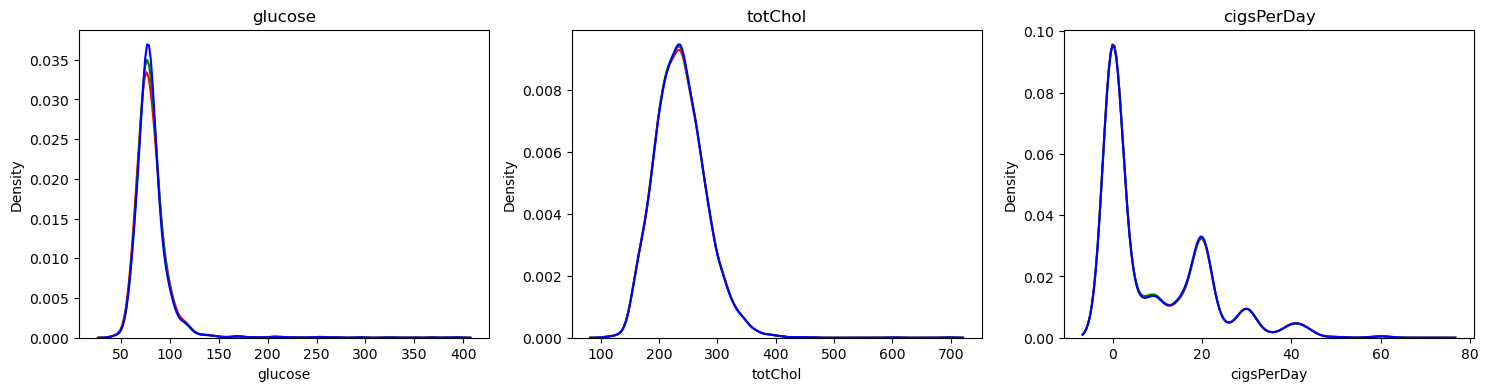

In [25]:
plt.subplots(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("glucose")
sns.kdeplot(df1Framingham['glucose'] , color = 'r' , label = 'No imputation')
sns.kdeplot(df1Framingham_knn['glucose'] , color = 'g' , label = 'KNN imputation')
sns.kdeplot(df1Framingham_mice['glucose'] , color = 'b' , label = 'MICE imputation')

plt.subplot(1, 3, 2)
plt.title("totChol")
sns.kdeplot(df1Framingham['totChol'] , color = 'r' , label = 'No imputation')
sns.kdeplot(df1Framingham_knn['totChol'] , color = 'g' , label = 'KNN imputation')
sns.kdeplot(df1Framingham_mice['totChol'] , color = 'b' , label = 'MICE imputation')

plt.subplot(1, 3, 3)
plt.title("cigsPerDay")
sns.kdeplot(df1Framingham['cigsPerDay'] , color = 'r' , label = 'No imputation')
sns.kdeplot(df1Framingham_knn['cigsPerDay'] , color = 'g' , label = 'KNN imputation')
sns.kdeplot(df1Framingham_mice['cigsPerDay'] , color = 'b' , label = 'MICE imputation')

plt.show()

Non ci sono grosse differenze rispetto ai dati iniziali, scegliamo comunque di tenere il nostro dataset con i valori predetti tramite K-NN.

In [26]:
# controllo su BPMeds
def verifica(row):
    if row <= 0.5:
        return 0
    else:
        return 1

df1Framingham_knn['BPMeds'] = df1Framingham_knn['BPMeds'].apply(verifica)

### Dummizzo le variabili categoriche

In [27]:
df1Framingham = pd.get_dummies(df1Framingham, columns=['education'])
df1Framingham

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,1,0,0,0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,0,0,1,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,0,1,0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,1,0,0,0


### Classi sbilanciate

In [28]:
print("Rischio di malattia coronarica: " + str(framingham.TenYearCHD.sum()))
print("Nessun rischio di malattia coronarica: " + str(framingham.TenYearCHD.count() - framingham.TenYearCHD.sum()))

Rischio di malattia coronarica: 644
Nessun rischio di malattia coronarica: 3594


Le due classi della variabile target sono sbilanciate, usiamo quindi la tecnica dell'Up Sample per la classe minoritaria (Rischio di contrarre la malattia coronarica).

In particolare, andiamo a replicare 500 campioni (senza ripetizione) che hanno un rischio di malattia coronarica, e li aggiungiamo al dataset dopo aver svolto un down-sample della classe maggioritaria.

In [29]:
df1Framingham_knnS = df1Framingham_knn[df1Framingham_knn["TenYearCHD"] == 1].copy()
df1Framingham_knnN = df1Framingham_knn[df1Framingham_knn["TenYearCHD"] == 0].copy()

sampleDf1 = df1Framingham_knnS.sample(n=500)
Framingham_knnN = df1Framingham_knnN.sample(1144)

Framingham_knnS = df1Framingham_knnS.append(sampleDf1)

FraminghamUltimate = Framingham_knnS.append(Framingham_knnN)
FraminghamUltimate["TenYearCHD"] = FraminghamUltimate["TenYearCHD"].astype(np.int64)
FraminghamUltimate

C:\Users\fadda\AppData\Local\Temp\ipykernel_14996\46604445.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Framingham_knnS = df1Framingham_knnS.append(sampleDf1)
C:\Users\fadda\AppData\Local\Temp\ipykernel_14996\46604445.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FraminghamUltimate = Framingham_knnS.append(Framingham_knnN)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0.0,61.0,3.0,1.0,30.0,0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000,1
6,0.0,63.0,1.0,0.0,0.0,0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.00000,1
15,0.0,38.0,2.0,1.0,20.0,0,0.0,1.0,0.0,221.0,140.0,90.0,21.35,95.0,70.00000,1
17,0.0,46.0,2.0,1.0,20.0,0,0.0,0.0,0.0,291.0,112.0,78.0,23.38,80.0,89.00000,1
25,1.0,47.0,4.0,1.0,20.0,0,0.0,0.0,0.0,294.0,102.0,68.0,24.18,62.0,66.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.0,41.0,1.0,0.0,0.0,0,0.0,0.0,0.0,197.0,121.0,84.0,23.07,80.0,72.04693,0
1412,0.0,46.0,2.0,1.0,20.0,0,0.0,0.0,0.0,161.0,100.0,64.0,20.66,75.0,60.00000,0
1189,0.0,48.0,1.0,0.0,0.0,0,0.0,1.0,0.0,169.0,243.0,142.5,28.49,85.0,77.00000,0
2256,1.0,48.0,1.0,0.0,0.0,0,0.0,1.0,0.0,232.0,130.5,90.0,29.07,85.0,118.00000,0


In [31]:
print("Rischio di malattia coronarica: " + str(FraminghamUltimate.TenYearCHD.sum()))
print("Nessun rischio di malattia coronarica: " + str(FraminghamUltimate.TenYearCHD.count() - FraminghamUltimate.TenYearCHD.sum()))

Rischio di malattia coronarica: 1144
Nessun rischio di malattia coronarica: 1144


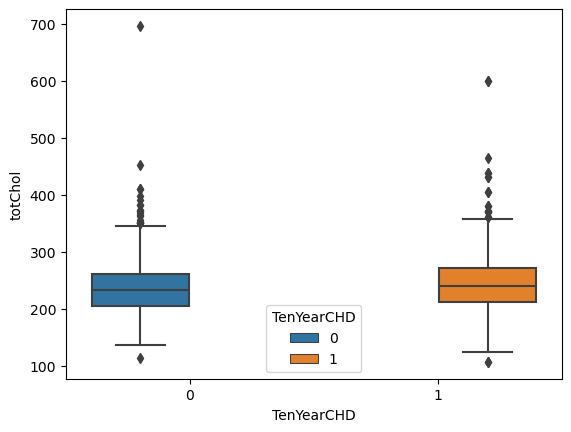

In [53]:
sns.boxplot(data=FraminghamUltimate, x="TenYearCHD", y="totChol", hue="TenYearCHD")

In [54]:
from scipy import stats
c = FraminghamUltimate[df1Framingham.TenYearCHD == 0]
v = FraminghamUltimate[df1Framingham.TenYearCHD == 1]

stats.ttest_ind(c.totChol, v.totChol)

C:\Users\fadda\AppData\Local\Temp\ipykernel_14996\2984058211.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = FraminghamUltimate[df1Framingham.TenYearCHD == 0]
C:\Users\fadda\AppData\Local\Temp\ipykernel_14996\2984058211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v = FraminghamUltimate[df1Framingham.TenYearCHD == 1]


Ttest_indResult(statistic=-4.633463304945978, pvalue=3.7981183130290595e-06)

Il pvalue è inferiore a 0.05, rifiutiamo l'ipotesi nulla, quindi esiste una differenza nei livelli di colesterolo medio tra i soggetti che presentano una malattia coronarica e quelli sani.

## Decision Tree

In [17]:
X = FraminghamUltimate.copy()
y = FraminghamUltimate["TenYearCHD"]
X = X.drop(columns="TenYearCHD")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

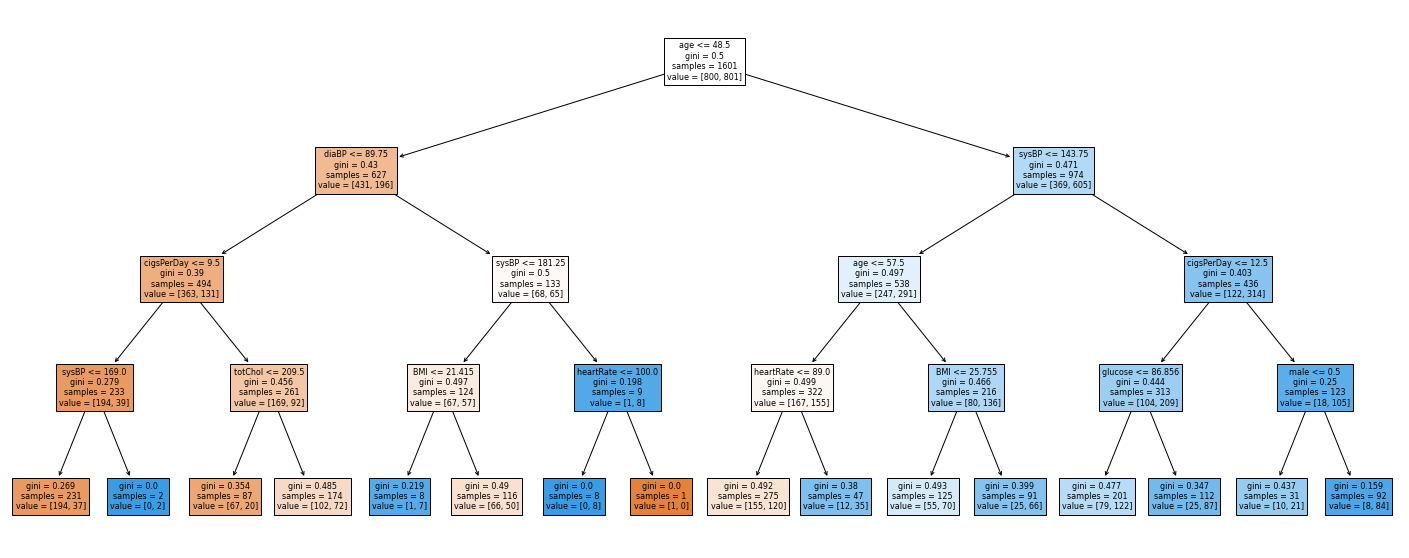

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

L'albero è stato tagliato ad una profondità di 4 livelli.
La prima feature che è stata presa in considerazione è "age", seguita da "diaBP" se l'età è inferiore di 49 anni altrimenti la feature presa come riferimento è "sysBP".

In [56]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importanza':feat_dict.values()})
feat_df

,Feature,Importanza
0,age,0.520074
1,sysBP,0.141928
2,cigsPerDay,0.096567
3,diaBP,0.069547
4,heartRate,0.062485
5,BMI,0.038698
6,glucose,0.027549
7,totChol,0.026055
8,male,0.017098
9,education,0.000000


Il classificatore ha ritenuto che "age" sia la feature più importante di tutti, seguita da "sysBP" e da tutte le altre in seguito. Non importanti risultano invece "currentSmoker" e "diabetes".

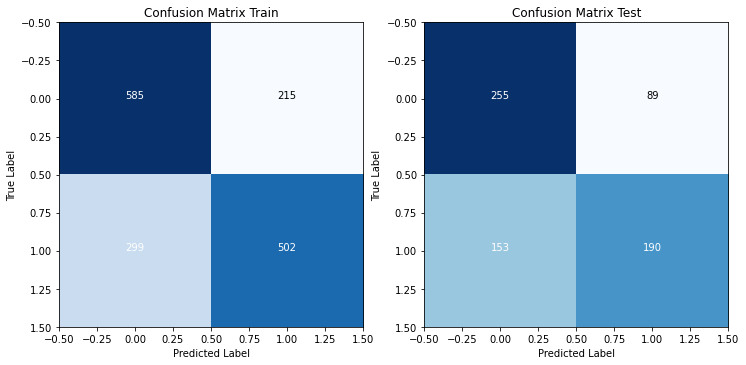

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Da un primo esame della matrice di confusione relativa al set di train (a sinistra) e al set di test (a destra), notiamo che non otteniamo un buon risultato, il classificatore infatti sbaglia abbastanza spesso e ne consegue che ci sia una forte presenza di falsi positivi e falsi negativi sia sul train che sul test.

Train AUC 0.743
Test AUC 0.701


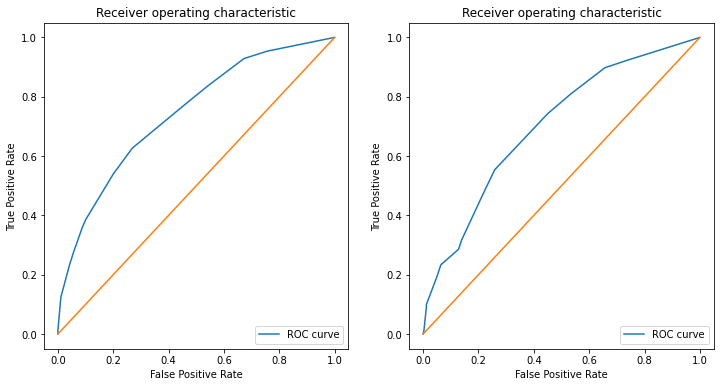

In [58]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_proba = clf.predict_proba(X_test)
y_train_proba = clf.predict_proba(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train, y_train_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, y_test_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

Ovviamente la curva ROC ci dà il risultato che sospettavamo, una curva molto vicino alla retta a 45°.

## XGboost

In [59]:
X = FraminghamUltimate.copy()
y = FraminghamUltimate["TenYearCHD"]
X = X.drop(columns="TenYearCHD")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [60]:
xgbtrain = xgb.DMatrix(data=X_train,
                       label=y_train)

xgbtest = xgb.DMatrix(data=X_test,
                       label=y_test)

param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 5  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

booster = xgb.train(param, xgbtrain, num_boost_round=num_trees)
predictions = booster.predict(xgbtrain)

C:\Users\fadda\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


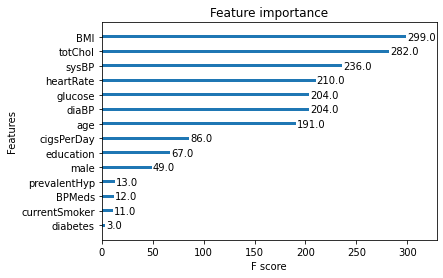

In [61]:
xgb.plot_importance(booster, grid=False)
plt.show()

Vediamo che XGBoost ci mostra un'importanza delle fature che è diversa da quella del Decision Tree, vediamo infatti che "age" non è più al primo posto ma è a metà per importanza. Al primo posto troviamo "BMI", "totChol" e tutti gli altri a seguire.

In [67]:
d = pd.DataFrame()
d['TenYearCHD'] = y_train
d['prediction'] = np.around(booster.predict(xgbtrain)).astype('int64')
d[['prediction', 'TenYearCHD']]

,prediction,TenYearCHD
634,0,0
3473,0,0
3785,0,0
3390,0,0
4095,1,0
...,...,...
3814,0,0
3195,1,1
1839,0,0
284,1,1


In [68]:
right = d.loc[d['prediction'] == d['TenYearCHD']]
wrong = d.loc[d['prediction'] != d['TenYearCHD']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] == 0]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 1487 elements in our recordset.
We classified correctly 1382 events.
We classified wrongly 105 events.
We had 44 false positive and 61 false negative.

Our precision has been 0.94.
Our recall has been 0.92.


In [69]:
xgbtest = xgb.DMatrix(data=X_test,
                       label=y_test)

d = pd.DataFrame()
d['TenYearCHD'] = y_test
d['prediction'] = np.around(booster.predict(xgbtest)).astype('int64')

right = d.loc[d['prediction'] == d['TenYearCHD']]
wrong = d.loc[d['prediction'] != d['TenYearCHD']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] != 1]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 801 elements in our recordset.
We classified correctly 559 events.
We classified wrongly 242 events.
We had 127 false positive and 115 false negative.

Our precision has been 0.69.
Our recall has been 0.72.


C:\Users\fadda\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


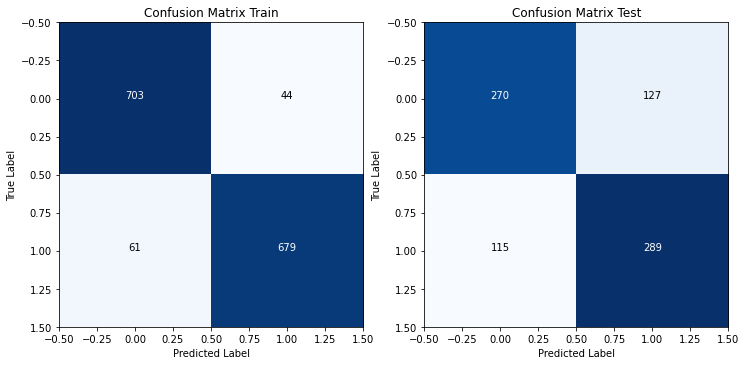

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = np.around(booster.predict(xgbtrain)).astype('int64')
y_test_hat = np.around(booster.predict(xgbtest)).astype('int64')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Le matrici di confusioni sono migliori nel train, sul test continuano ad esserci diversi falsi positivi e negativi.

Train AUC 0.981
Test AUC 0.764


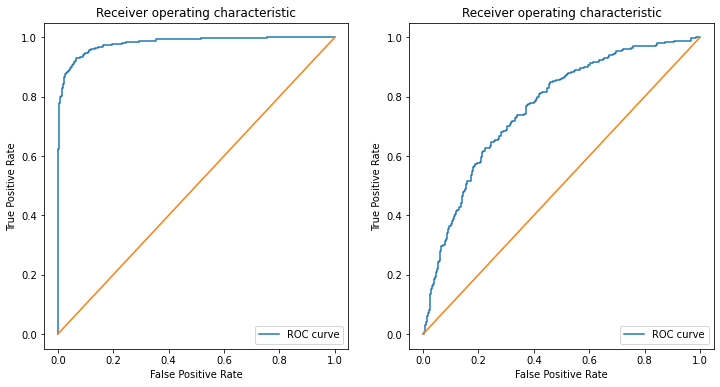

In [71]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_proba = booster.predict(xgbtest)
y_train_proba = booster.predict(xgbtrain)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

La curva ROC per il TRAIN è buona anche se questo potrebbe essere un sintomo di overfitting; quella relativa al TEST è migliore rispetto a quella del Decision Tree.

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       747
           1       0.94      0.92      0.93       740

    accuracy                           0.93      1487
   macro avg       0.93      0.93      0.93      1487
weighted avg       0.93      0.93      0.93      1487



In [75]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       397
           1       0.69      0.72      0.70       404

    accuracy                           0.70       801
   macro avg       0.70      0.70      0.70       801
weighted avg       0.70      0.70      0.70       801



Nonostante il modello non sia dei migliori e otteniamo valori di precision e recall sul set di train (il che potrebbe indicare una troppa aderenza ai dati di train); il classificatore riesce nella parte di test ad ottenere una precision e recall relativamente sufficiente sia per la classe positiva che negativa (rischio di contrarre una malattia oppure no).

Nel nostro caso un falso negativo (ossia una persona che è malata ma che il classificatore classifica come sano) è molto più grave rispetto al contrario; raggiungendo comunque una RECALL di 0.7 per entrambi le classi possiamo abbastanza essere soddisfatti del nostro classificatore.